Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1

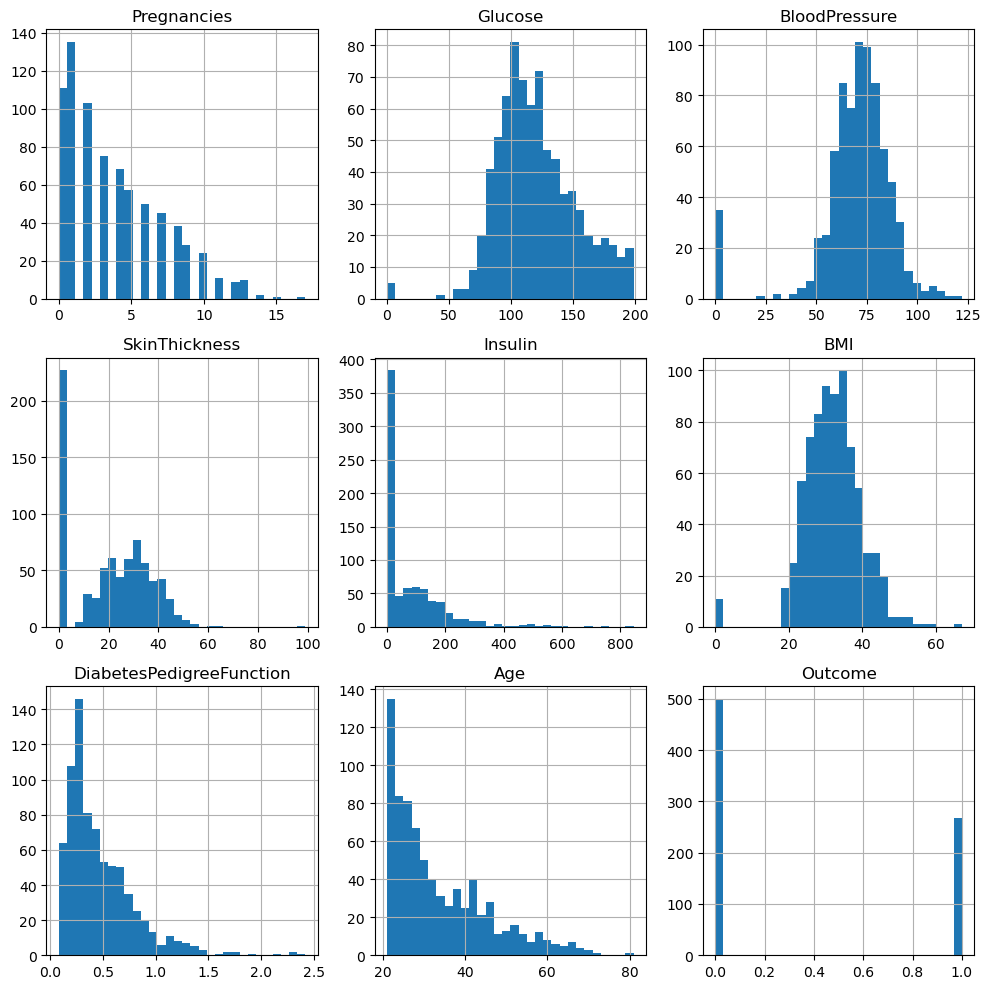

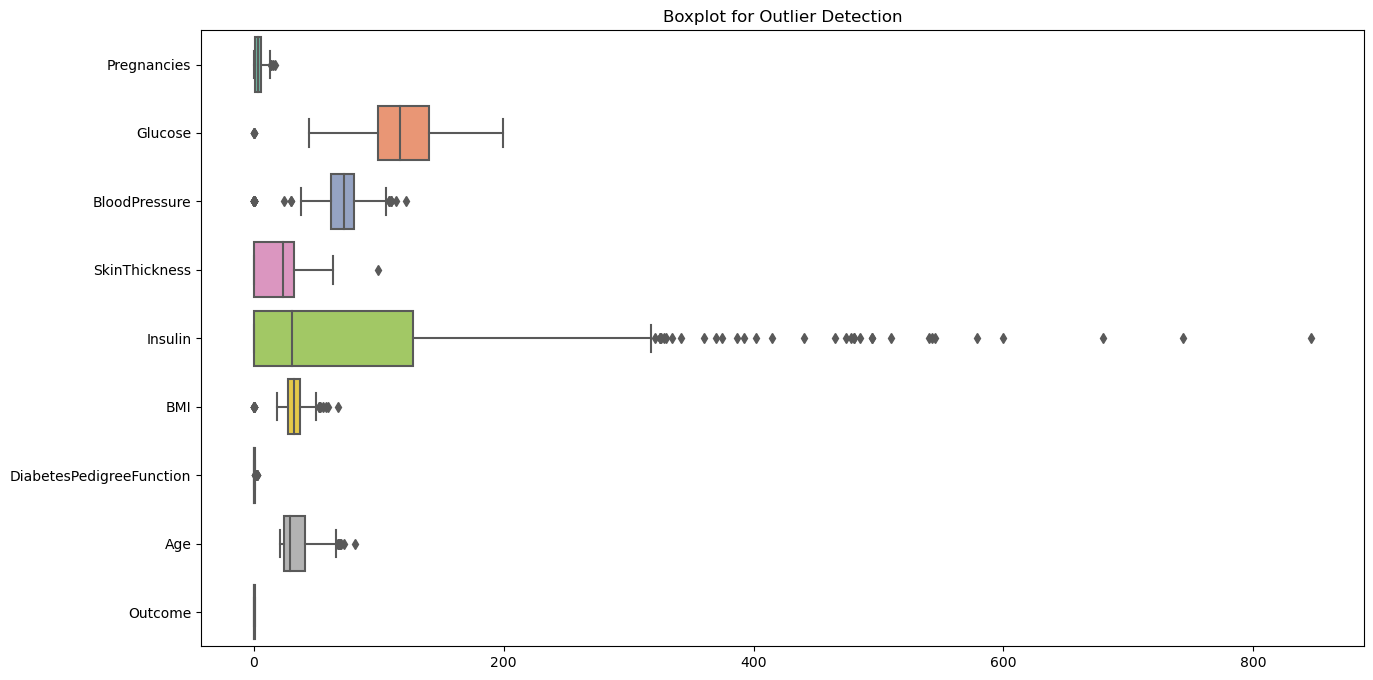

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# dataset is downloaded from Kaggle and is in CSV format

file_path = 'E:\PROJECT DS\Predcition\diabetes.csv'  
df = pd.read_csv(file_path)

# Step 2: Explore the dataset
# Display the first few rows of the dataset to understand its structure
print("Dataset Preview:")
print(df.head())

# Get dataset information (column names, data types, non-null counts)
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Step 3: Handle missing values
# Option 1: Drop rows with missing values (if few missing)
df_cleaned = df.dropna()

# Option 2: Impute missing values with median (for numerical columns)
# df_cleaned = df.fillna(df.median())

print("\nMissing Values After Cleaning:")
print(df_cleaned.isnull().sum())

# Step 4: Handle duplicates
# Drop duplicate rows (if any)
df_cleaned = df_cleaned.drop_duplicates()

print("\nDuplicate Rows After Cleaning:", df_cleaned.duplicated().sum())

# Step 5: Summary statistics
print("\nSummary Statistics:")
print(df_cleaned.describe())

# Step 6: Visualize data distribution (optional, but helpful for insights)
# Plot histograms to see the distribution of each feature
df_cleaned.hist(figsize=(10, 10), bins=30)
plt.tight_layout()
plt.show()

# Step 7: Checking for outliers using boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned, orient="h", palette="Set2")
plt.title("Boxplot for Outlier Detection")
plt.show()

# Now, df_cleaned is ready for further feature engineering and model building.


In [2]:
# Step 2.2: Feature Engineering

# 1. Create new features (if applicable)
# For example, if BMI is not available in the dataset, you can calculate it if height and weight are provided.
# Assuming we already have BMI in the dataset, no need to calculate.

# If the dataset has features like age, you might want to create age groups:
def age_group(age):
    if age < 30:
        return 'Young'
    elif 30 <= age < 60:
        return 'Middle_Aged'
    else:
        return 'Senior'

# Assuming there is an 'Age' column in the dataset
df_cleaned['Age_Group'] = df_cleaned['Age'].apply(age_group)

print("\nAge groups created:")
print(df_cleaned[['Age', 'Age_Group']].head())

# 2. Handling categorical variables (Encoding)
# If there are categorical features, encode them to numerical values.
# For example, encoding 'Age_Group' into numbers
df_cleaned = pd.get_dummies(df_cleaned, columns=['Age_Group'], drop_first=True)

print("\nAfter encoding Age_Group:")
print(df_cleaned.head())

# 3. Feature Scaling / Normalization
# It's important to scale or normalize numerical features for some models (e.g., neural networks, KNN).
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization (mean=0, std=1) or MinMax scaling (scaling between 0 and 1)
scaler = StandardScaler()

# Select numerical columns for scaling
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']  # Example columns
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

print("\nNumerical columns after scaling:")
print(df_cleaned[numerical_columns].head())

# 4. Feature Selection (optional)
# If you want to drop certain less important features based on domain knowledge or correlation analysis, you can do so.
# For example, dropping 'SkinThickness' if it's not a strong predictor.
# df_cleaned = df_cleaned.drop(['SkinThickness'], axis=1)

# Step 2.2 complete: The cleaned and engineered dataset is ready for further steps.

print("\nDataset after Feature Engineering:")
print(df_cleaned.head())



Age groups created:
   Age    Age_Group
0   50  Middle_Aged
1   31  Middle_Aged
2   32  Middle_Aged
3   21        Young
4   33  Middle_Aged

After encoding Age_Group:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Age_Group_Senior  Age_Group_Young  
0                     0.627   50        1             False            False  
1                     0.351   31        0             False            False  
2                     0.672   32        1             False            False  
3                     0.167   21        0             False             True  
4   

<Figure size 1000x600 with 0 Axes>

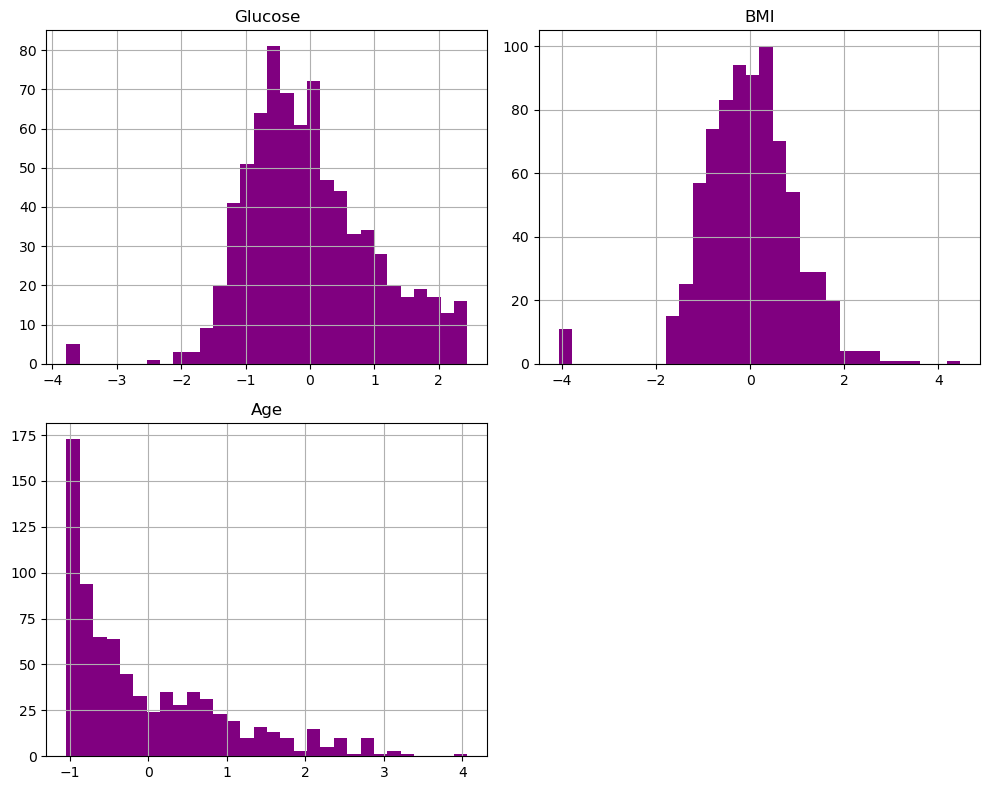

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


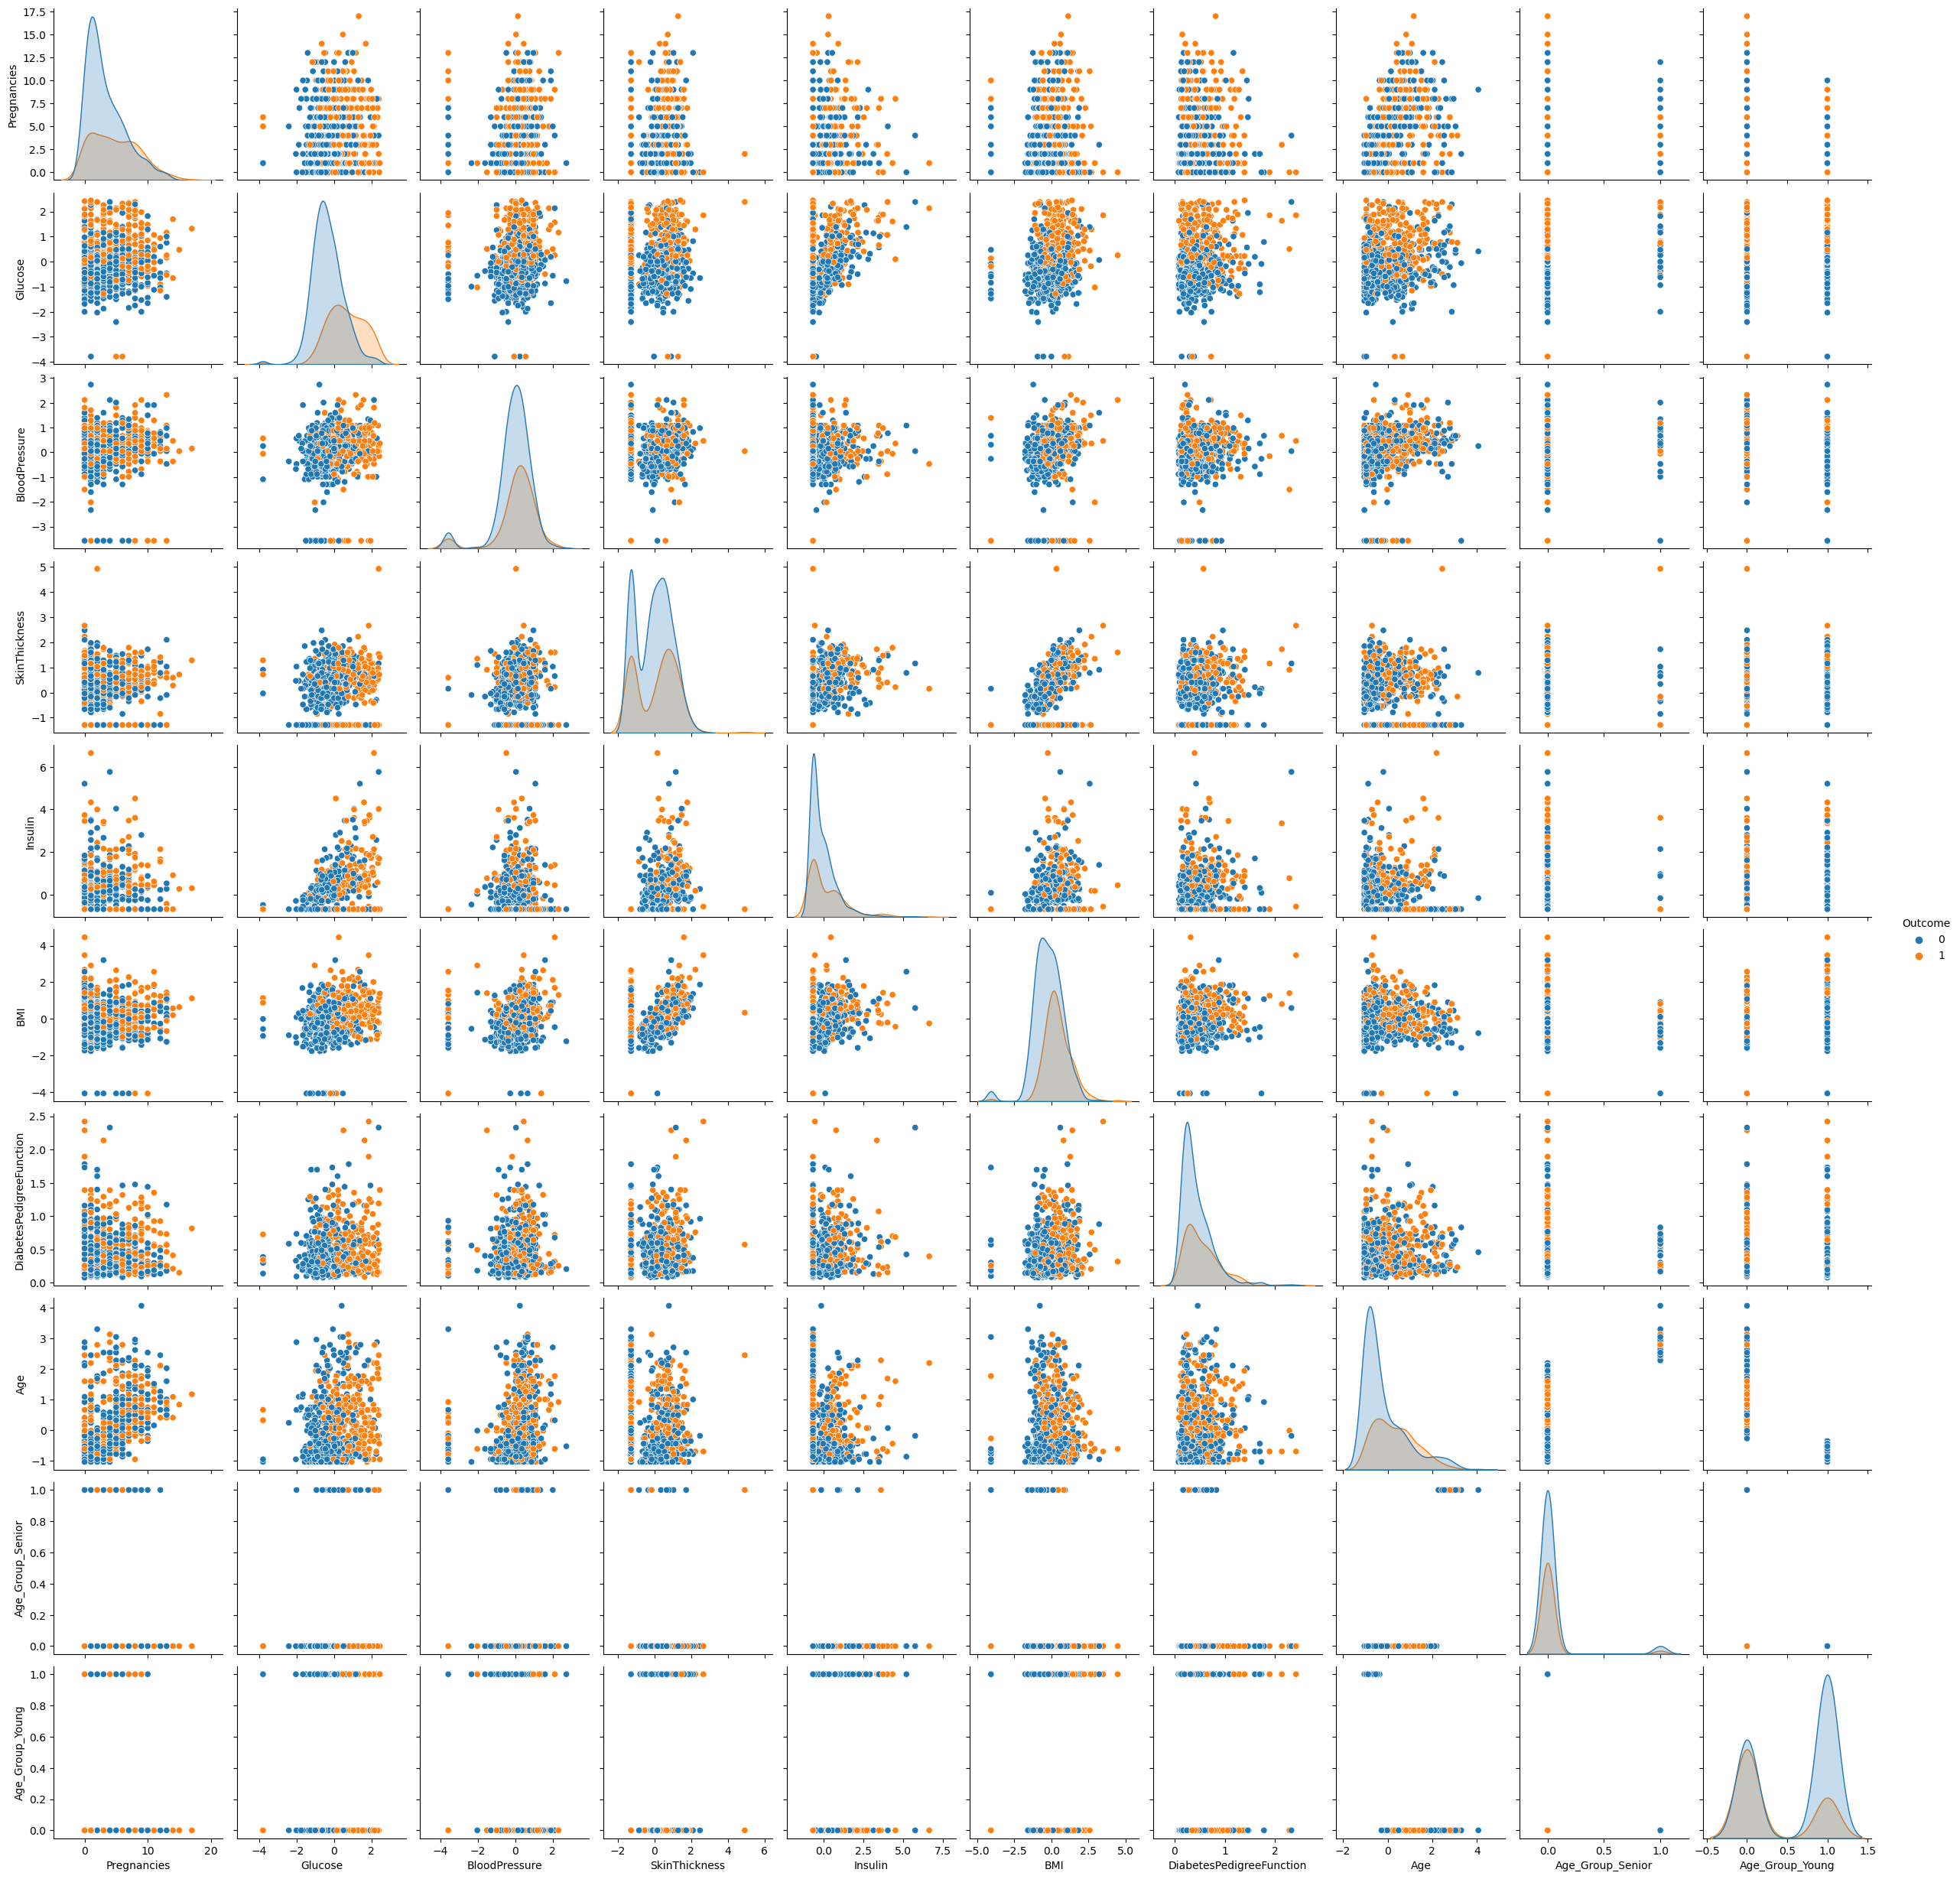

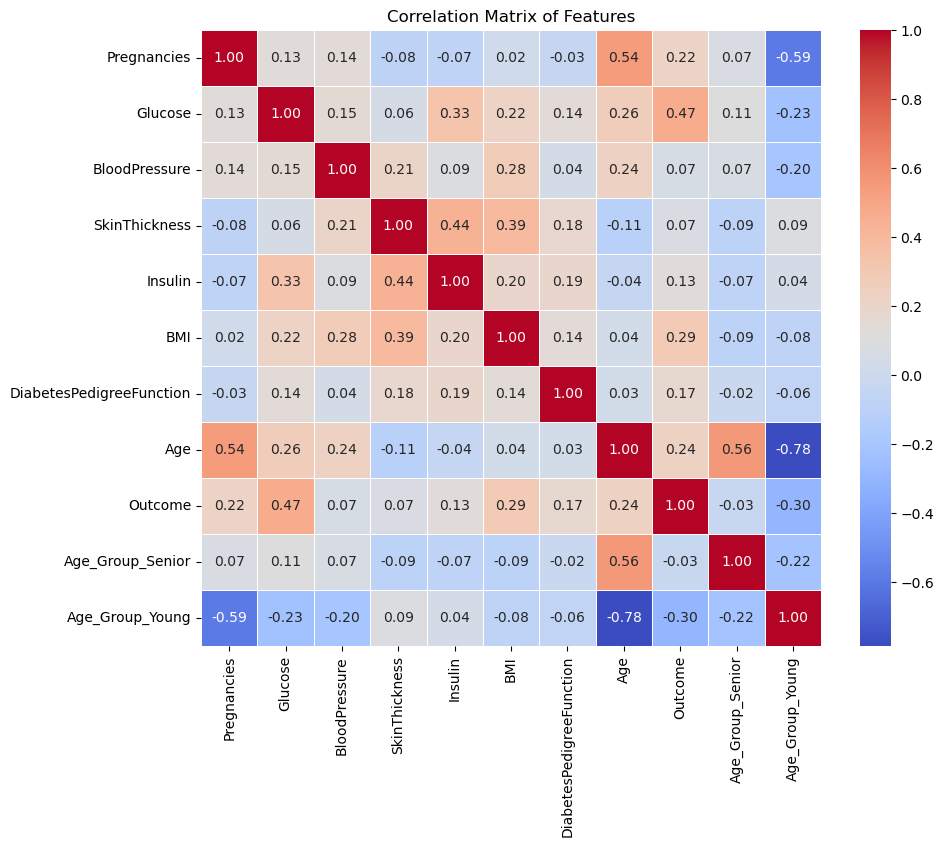

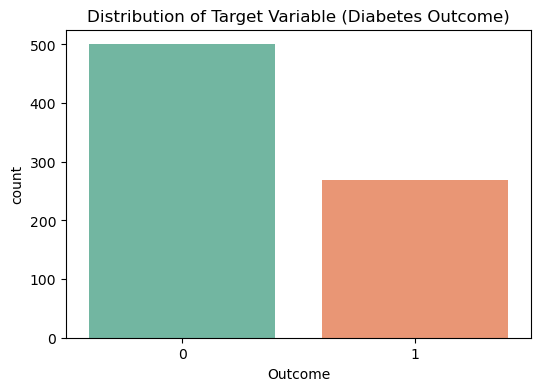

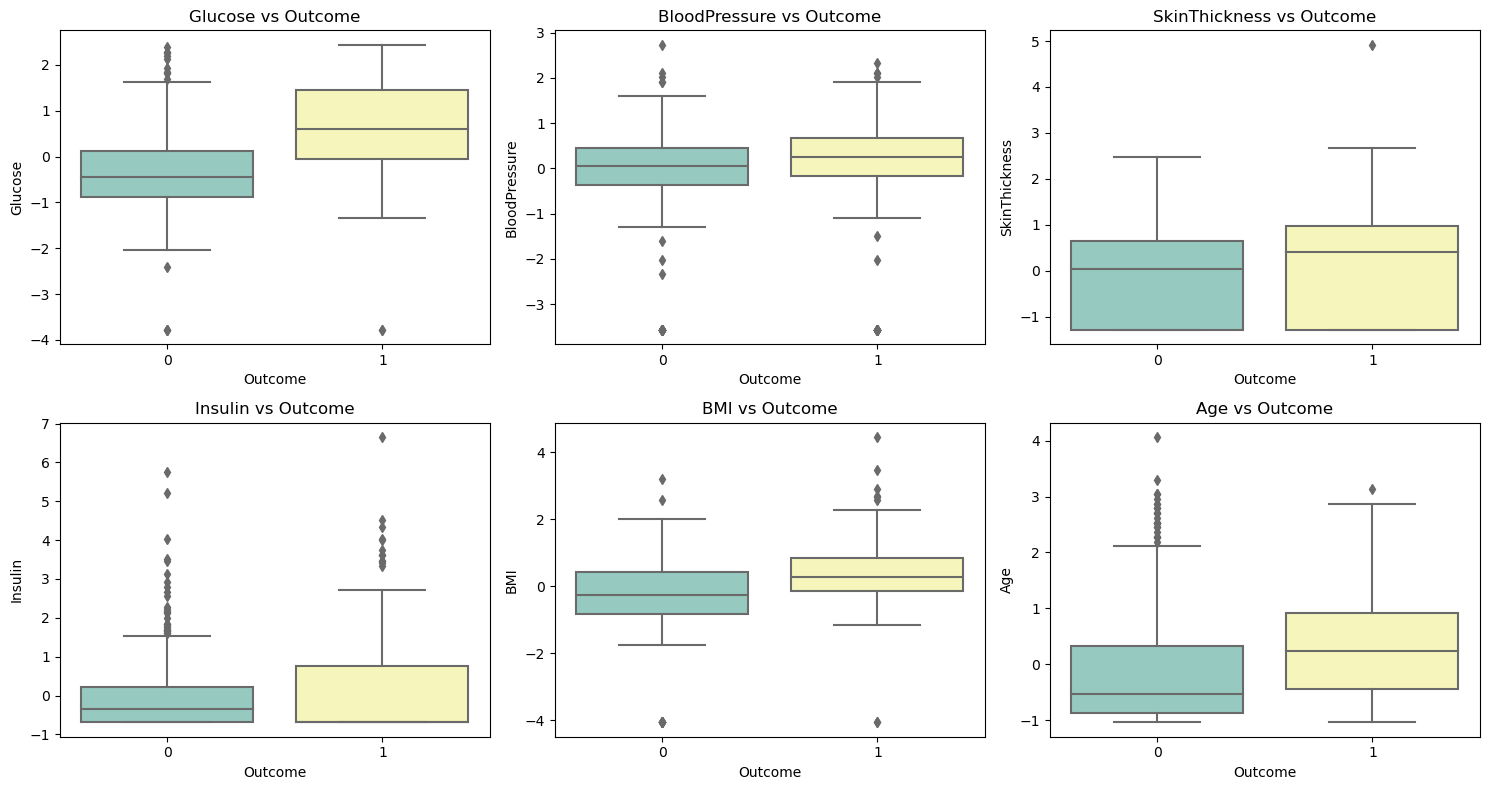


Correlation of Features with the Target Variable (Outcome):
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Age_Group_Senior           -0.029620
Age_Group_Young            -0.296203
Name: Outcome, dtype: float64


In [3]:
# Step 2.3: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualizing the distribution of key features (e.g., Glucose, BMI, Age)
plt.figure(figsize=(10, 6))
df_cleaned[['Glucose', 'BMI', 'Age']].hist(bins=30, figsize=(10, 8), color='purple')
plt.tight_layout()
plt.show()

# 2. Pairplot to visualize relationships between features
# This gives a visual insight into how features relate to each other
sns.pairplot(df_cleaned, hue="Outcome", diag_kind='kde')  # Assuming 'Outcome' is the target variable (diabetes diagnosis)
plt.show()

# 3. Correlation Matrix
# This helps identify the relationship between numerical features
plt.figure(figsize=(10, 8))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# 4. Distribution of the Target Variable (Outcome)
# Let's visualize the balance of target classes (e.g., diabetes vs non-diabetes)
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df_cleaned, palette='Set2')
plt.title("Distribution of Target Variable (Diabetes Outcome)")
plt.show()

# 5. Boxplots to show feature distributions based on Outcome
# This shows how features vary across the target classes
plt.figure(figsize=(15, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Outcome', y=column, data=df_cleaned, palette="Set3")
    plt.title(f'{column} vs Outcome')
plt.tight_layout()
plt.show()

# 6. Check if any feature has a strong correlation with the target (Outcome)
correlation_with_target = corr_matrix['Outcome'].sort_values(ascending=False)
print("\nCorrelation of Features with the Target Variable (Outcome):")
print(correlation_with_target)

# Summary:
# - Distributions, correlations, and relationships between features and the target variable are now clearer.
# - Glucose, BMI, and Insulin levels may have a strong correlation with the diabetes outcome based on the heatmap.


In [4]:
# Step 3.1: Model Selection (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming the target variable is 'Outcome' (0 = No Diabetes, 1 = Diabetes)

# Define the features (X) and the target (y)
X = df_cleaned.drop('Outcome', axis=1)  # Drop the target column
y = df_cleaned['Outcome']  # Target column

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Now, we move to model training...


In [5]:
# Step 3.2: Model Training

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# After training, we proceed to model evaluation...


RandomForestClassifier(random_state=42)

Accuracy: 74.68%

Confusion Matrix:
[[81 18]
 [21 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154


Feature Importances:
                    Feature  Importance
1                   Glucose    0.252578
5                       BMI    0.165356
7                       Age    0.133837
6  DiabetesPedigreeFunction    0.118290
2             BloodPressure    0.090207
4                   Insulin    0.073813
0               Pregnancies    0.071745
3             SkinThickness    0.062015
9           Age_Group_Young    0.027485
8          Age_Group_Senior    0.004674


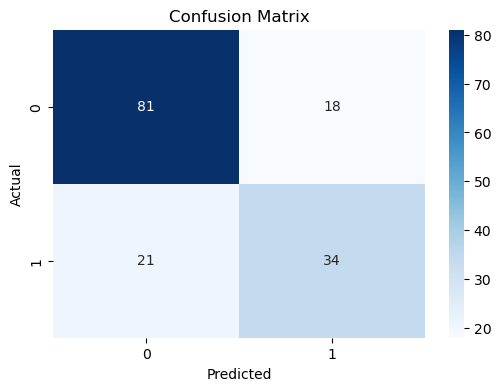

In [6]:
# Step 3.3: Model Evaluation

# Predict the outcomes for the test set
y_pred = rf_model.predict(X_test)

# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 2. Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 3. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Feature Importance (Optional but useful in Random Forests)
# Shows which features are most important for predictions
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# 5. Visualization of the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# The model evaluation is now complete.


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Feature importance from Random Forest
print("Random Forest Feature Importance:")
rf_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
rf_importances = rf_importances.sort_values(by="Importance", ascending=False)
print(rf_importances)


Random Forest Feature Importance:
                    Feature  Importance
1                   Glucose    0.252578
5                       BMI    0.165356
7                       Age    0.133837
6  DiabetesPedigreeFunction    0.118290
2             BloodPressure    0.090207
4                   Insulin    0.073813
0               Pregnancies    0.071745
3             SkinThickness    0.062015
9           Age_Group_Young    0.027485
8          Age_Group_Senior    0.004674


In [8]:
# Import the required module for roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate using metrics
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {rf_auc:.2f}")



Random Forest Evaluation:
Accuracy: 74.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154

ROC-AUC: 0.83


In [9]:
# Import the required module for GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Tune Random Forest using different numbers of trees
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_rf.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters for Random Forest: {grid_rf.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_rf.best_score_:.2f}")


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.79


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Initialize Grid Search with Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_rf.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters for Random Forest: {grid_rf.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_rf.best_score_:.2f}")


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train)

# Transform the test data
X_test_pca = pca.transform(X_test)


In [ ]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(grid_rf.best_estimator_)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [ ]:
# Predict on the holdout test set
y_pred_final = grid_rf.best_estimator_.predict(X_test)

# Evaluate the final model
print("Final Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

# ROC-AUC for the final model
final_auc = roc_auc_score(y_test, grid_rf.best_estimator_.predict_proba(X_test)[:, 1])
print(f"Final ROC-AUC: {final_auc:.2f}")


In [ ]:
import joblib
joblib.dump(grid_rf.best_estimator_, 'best_random_forest_model.pkl')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define your parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_rf.fit(X_train, y_train)


In [ ]:
import joblib
joblib.dump(grid_rf.best_estimator_, 'best_random_forest_model.pkl')


In [ ]:
import joblib

# Ensure that you have run the grid search and trained the model
joblib.dump(grid_rf.best_estimator_, 'best_random_forest_model.pkl')


In [ ]:
import joblib

# Load the trained model
model = joblib.load('best_random_forest_model.pkl')
